In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Đường dẫn đến file zip và thư mục giải nén
zip_file_path = '/content/drive/MyDrive/dataset_barknet.zip'
extract_to_path = '/content/extracted_data'

In [ ]:
import os
# Giải nén file zip
import zipfile
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

# Liệt kê các tệp trong thư mục giải nén
extracted_files = os.listdir(extract_to_path)
print("Các tệp trong thư mục giải nén:", extracted_files)

# Liệt kê các tệp trong thư mục dataset_barknet
extracted_subdir = f'{extract_to_path}/dataset_barknet'
subdir_files = os.listdir(extracted_subdir)
print("Các tệp trong thư mục dataset_barknet:", subdir_files)

Các tệp trong thư mục giải nén: ['dataset_barknet']
Các tệp trong thư mục dataset_barknet: ['valid', 'train', 'test']


In [ ]:
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Đường dẫn đến các thư mục con
train_subdir = '/content/extracted_data/dataset_barknet/train'
valid_subdir = '/content/extracted_data/dataset_barknet/valid'
test_subdir = '/content/extracted_data/dataset_barknet/test'

In [ ]:
# Hàm đọc và tiền xử lý hình ảnh
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

In [ ]:
# Hàm trích xuất đặc trưng từ hình ảnh
def extract_features(directory, model):
    features = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for img_name in os.listdir(label_dir):
                img_path = os.path.join(label_dir, img_name)
                img_array = load_and_preprocess_image(img_path)
                feature = model.predict(img_array)
                features.append(feature.flatten())
                labels.append(label)
    return np.array(features), np.array(labels)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
# Sử dụng mô hình ResNet50 để trích xuất đặc trưng
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.preprocessing import image
# Trích xuất đặc trưng cho tập huấn luyện, kiểm tra và xác thực
X_train, y_train = extract_features(train_subdir, base_model)
X_test, y_test = extract_features(test_subdir, base_model)
X_valid, y_valid = extract_features(valid_subdir, base_model)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
1/1 [==============================] - 0s 209ms/step


In [ ]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')
print(f'Shape of X_valid: {X_valid.shape}')
print(f'Shape of y_valid: {y_valid.shape}')


Shape of X_train: (4557, 2048)
Shape of y_train: (4557,)
Shape of X_test: (650, 2048)
Shape of y_test: (650,)
Shape of X_valid: (1302, 2048)
Shape of y_valid: (1302,)


In [ ]:
print(f'Number of missing values in X_train: {np.isnan(X_train).sum()}')
print(f'Number of missing values in X_test: {np.isnan(X_test).sum()}')
print(f'Number of missing values in X_valid: {np.isnan(X_valid).sum()}')


Number of missing values in X_train: 0
Number of missing values in X_test: 0
Number of missing values in X_valid: 0


In [ ]:

# Khám Phá và Phân Tích Dữ liệu Sơ bộ
print("Kích thước của tập huấn luyện:", X_train.shape)
print("Kích thước của tập kiểm tra:", X_test.shape)
print("Số lượng nhãn trong tập huấn luyện:", len(np.unique(y_train)))
print("Số lượng nhãn trong tập kiểm tra:", len(np.unique(y_test)))

Kích thước của tập huấn luyện: (4557, 16384)
Kích thước của tập kiểm tra: (650, 16384)
Số lượng nhãn trong tập huấn luyện: 3
Số lượng nhãn trong tập kiểm tra: 3


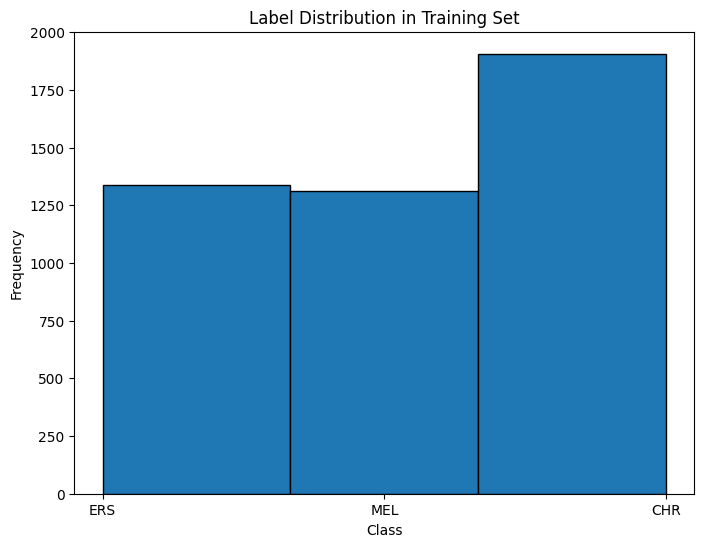

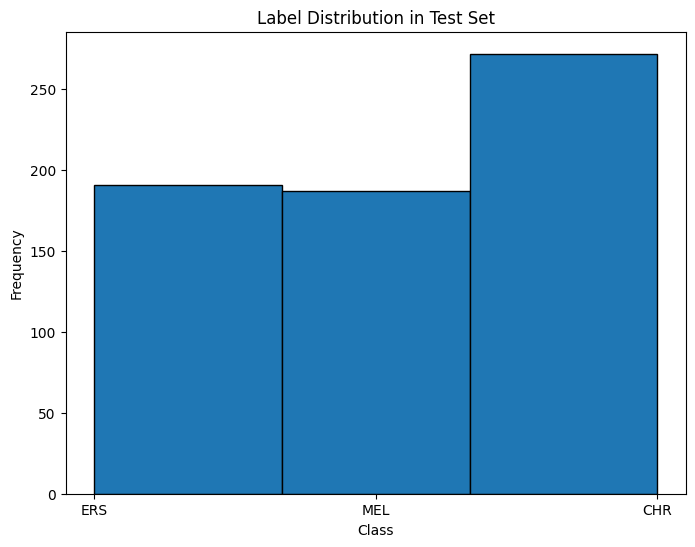

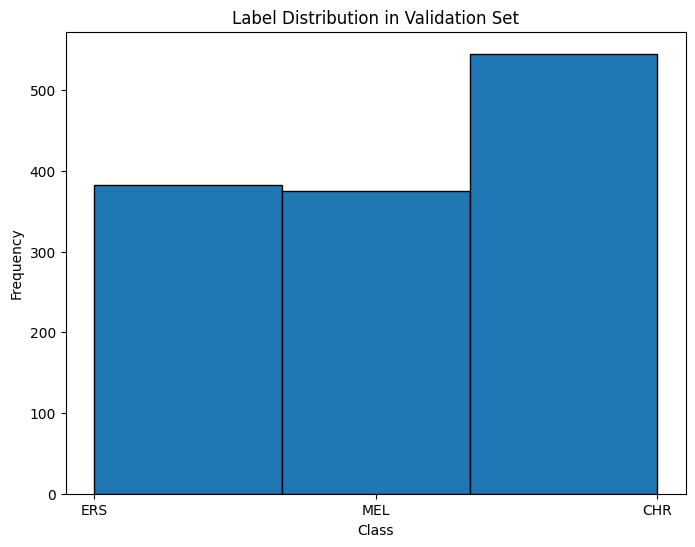

In [ ]:
import matplotlib.pyplot as plt

def plot_label_distribution(y, title):
    plt.figure(figsize=(8, 6))
    plt.hist(y, bins=len(np.unique(y)), edgecolor='k')
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.show()

plot_label_distribution(y_train, 'Label Distribution in Training Set')
plot_label_distribution(y_test, 'Label Distribution in Test Set')
plot_label_distribution(y_valid, 'Label Distribution in Validation Set')


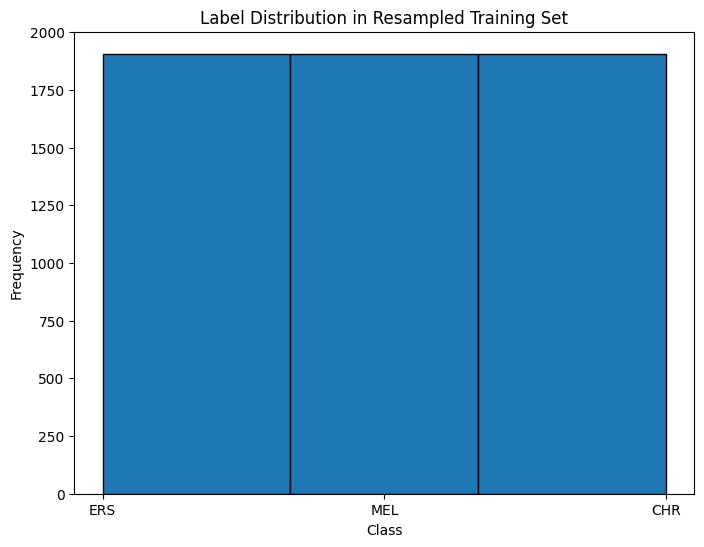

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Kiểm tra lại phân phối nhãn sau khi over-sampling
plot_label_distribution(y_train_resampled, 'Label Distribution in Resampled Training Set')


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Xây dựng mô hình Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Đánh giá mô hình trên tập kiểm tra
y_pred_test = model.predict(X_test)
print(f'Test Accuracy: {accuracy_score(y_test, y_pred_test)}')
print('Test Classification Report:')
print(classification_report(y_test, y_pred_test))

# Đánh giá mô hình trên tập xác thực
y_pred_valid = model.predict(X_valid)
print(f'Validation Accuracy: {accuracy_score(y_valid, y_pred_valid)}')
print('Validation Classification Report:')
print(classification_report(y_valid, y_pred_valid))

Test Accuracy: 0.7938461538461539
Test Classification Report:
              precision    recall  f1-score   support

         CHR       0.68      0.98      0.81       272
         ERS       0.91      0.43      0.58       191
         MEL       0.98      0.89      0.94       187

    accuracy                           0.79       650
   macro avg       0.86      0.77      0.78       650
weighted avg       0.84      0.79      0.78       650

Validation Accuracy: 0.8709677419354839
Validation Classification Report:
              precision    recall  f1-score   support

         CHR       0.81      0.95      0.87       545
         ERS       0.91      0.65      0.76       382
         MEL       0.95      0.98      0.97       375

    accuracy                           0.87      1302
   macro avg       0.89      0.86      0.87      1302
weighted avg       0.88      0.87      0.87      1302



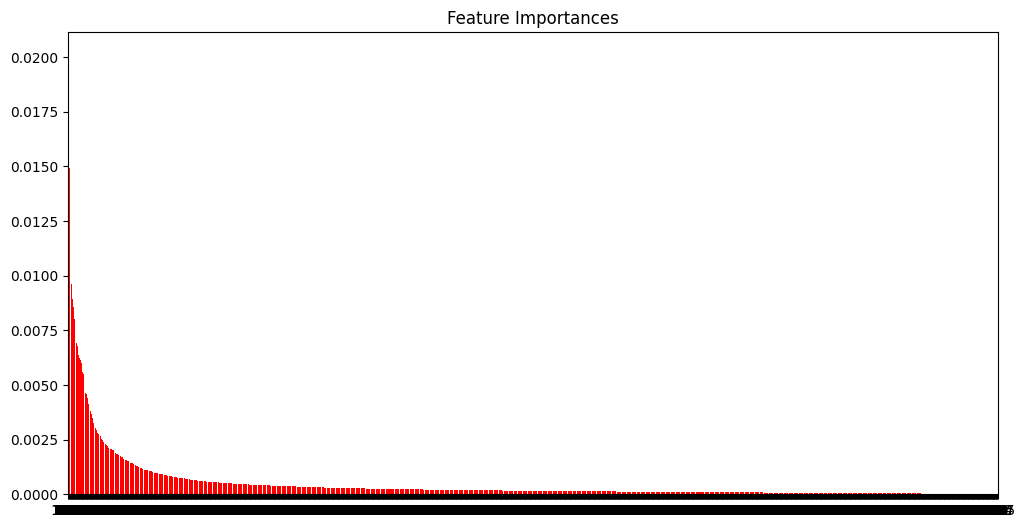

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Vẽ biểu đồ tầm quan trọng của các đặc trưng
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()


1/1 [==============================] - 1s 1s/step
Dự đoán là: ERS
Nhãn thực tế là: ERS


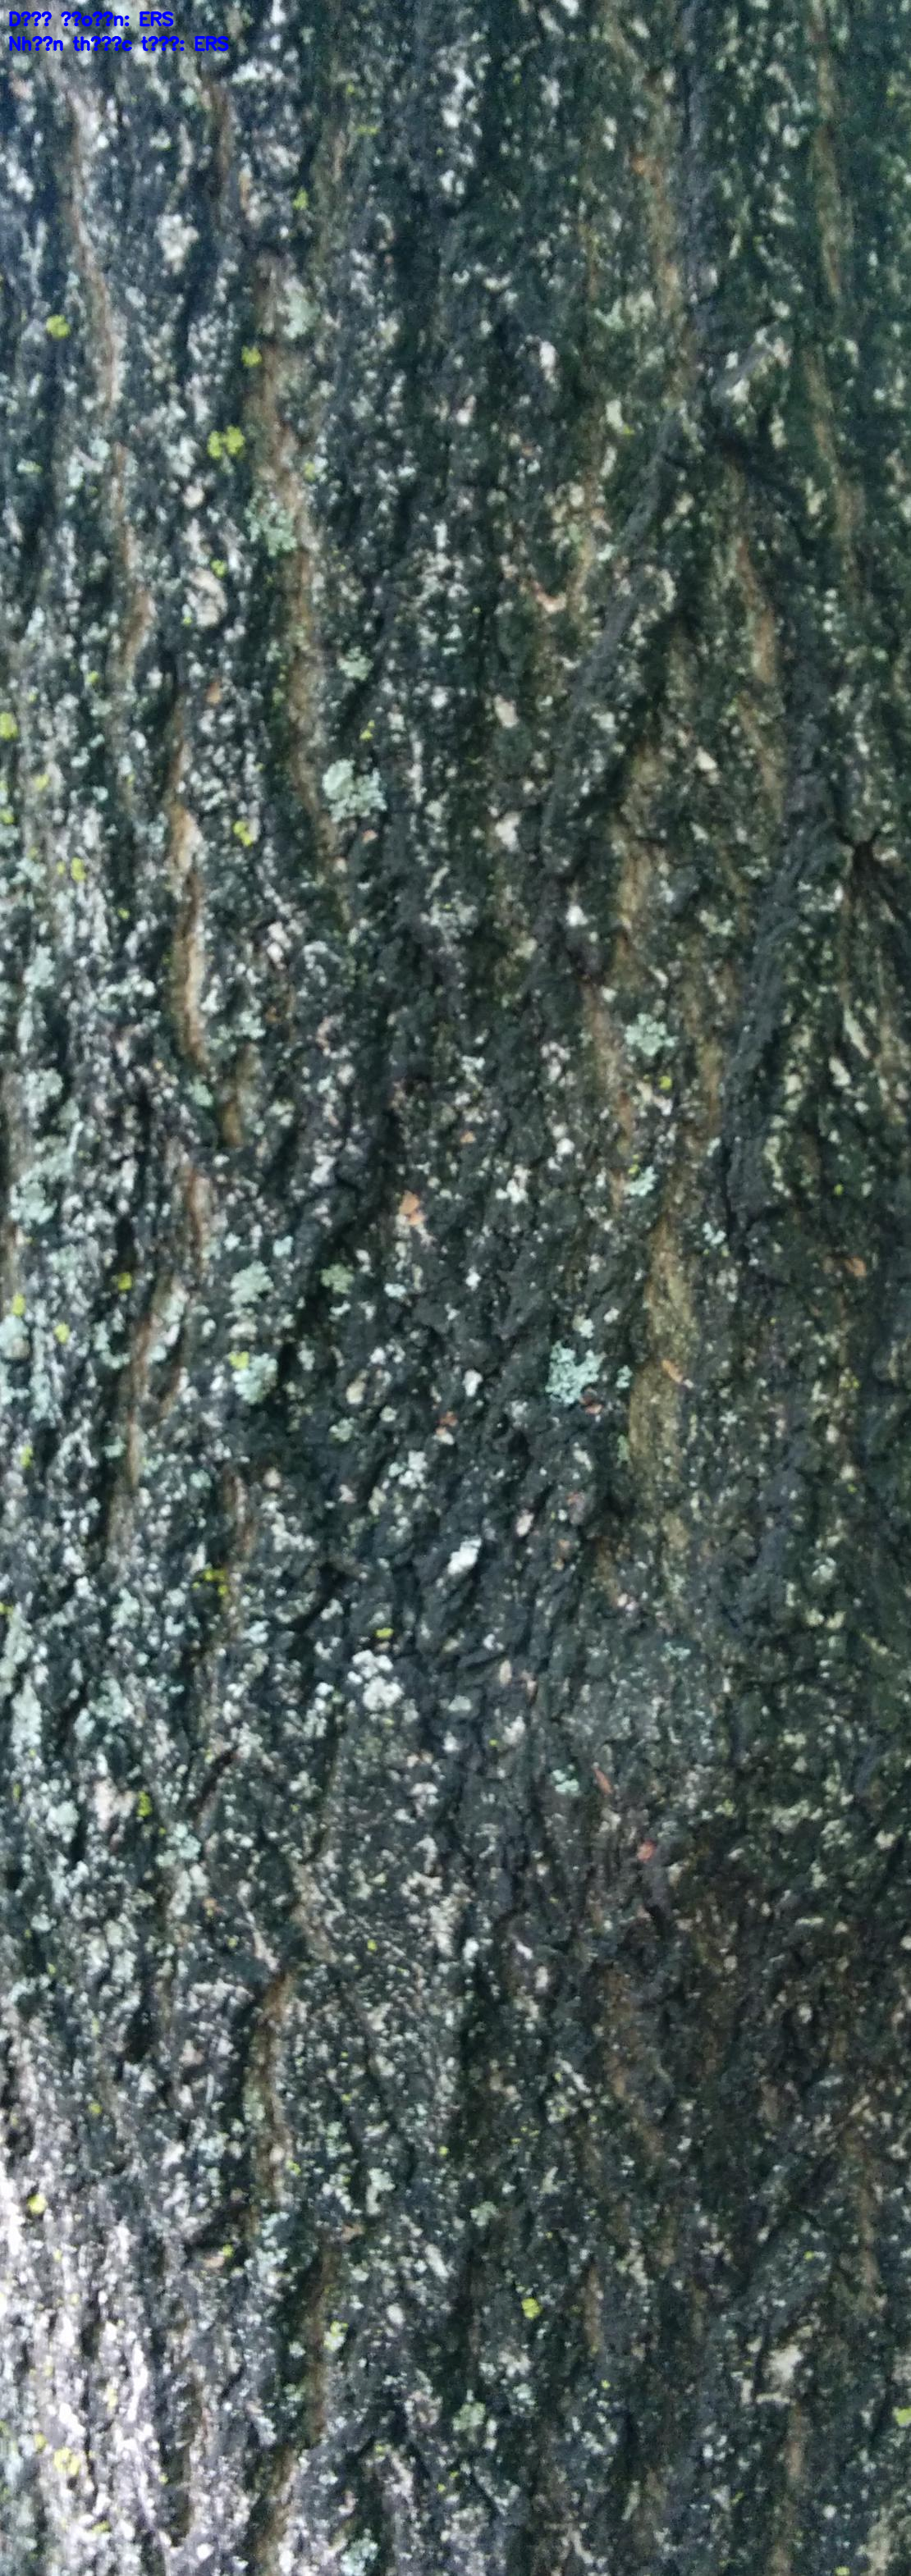

In [ ]:
import joblib
import cv2
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from google.colab.patches import cv2_imshow
import os

# Tải mô hình Random Forest đã huấn luyện
model = joblib.load('random_forest_model.pkl')

# Tải lại đối tượng LabelEncoder đã sử dụng trước đó
le = joblib.load('label_encoder.pkl')

# Đường dẫn tới hình ảnh cần kiểm tra
img_path = '/content/extracted_data/dataset_barknet/test/ERS/208_ERS_60_Nexus 5_20170607_155244_10.jpg'

# Tự động nhận biết nhãn từ đường dẫn hình ảnh
actual_label = os.path.basename(os.path.dirname(img_path))

# Tải và tiền xử lý hình ảnh
img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

# Sử dụng mô hình ResNet50 để trích xuất đặc trưng
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
img_features = base_model.predict(img)
img_features = img_features.flatten().reshape(1, -1)

# Dự đoán nhãn của hình ảnh
predicted_label_encoded = model.predict(img_features)

# Chuyển đổi nhãn số thành nhãn gốc
predicted_label = le.inverse_transform(predicted_label_encoded)

print(f'Dự đoán là: {predicted_label[0]}')
print(f'Nhãn thực tế là: {actual_label}')

# Hiển thị hình ảnh sử dụng OpenCV
img_display = cv2.imread(img_path)  # Tải lại hình ảnh để hiển thị
cv2.putText(img_display, f'Dự đoán: {predicted_label[0]}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2, cv2.LINE_AA)
cv2.putText(img_display, f'Nhãn thực tế: {actual_label}', (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2, cv2.LINE_AA)
cv2_imshow(img_display)
